Importing the libraries

In [1]:
import sys

import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression



import torch 
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim

import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## Data Cleaning

In [2]:
# Load data from CSV file
file_path = "output.csv"
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Flight Number             32 non-null     object
 1   Date                      29 non-null     object
 2   Taxi Takeoff              29 non-null     object
 3   Average Delay Takeoff     29 non-null     object
 4   Gate Departure Actual     29 non-null     object
 5   Gate Departure Estimated  29 non-null     object
 6   Takeoff Actual            29 non-null     object
 7   Takeoff Estimated         29 non-null     object
 8   Taxi Landing              29 non-null     object
 9   Average Delay Landing     29 non-null     object
 10  Landing Actual            29 non-null     object
 11  Landing Estimated         29 non-null     object
 12  Gate Arrival Actual       29 non-null     object
 13  Gate Arrival Estimated    29 non-null     object
dtypes: object(14)
memory usage: 

In [4]:
df.isna().sum()

Flight Number               0
Date                        3
Taxi Takeoff                3
Average Delay Takeoff       3
Gate Departure Actual       3
Gate Departure Estimated    3
Takeoff Actual              3
Takeoff Estimated           3
Taxi Landing                3
Average Delay Landing       3
Landing Actual              3
Landing Estimated           3
Gate Arrival Actual         3
Gate Arrival Estimated      3
dtype: int64

## Dropping the null values

In [5]:
df = df.dropna()

## Histogram representation

/var/folders/_s/m46xfxxs26s25124q82kht4w0000gn/T/ipykernel_58340/1011661728.py:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = clean_and_convert(df[column].copy())
/var/folders/_s/m46xfxxs26s25124q82kht4w0000gn/T/ipykernel_58340/1011661728.py:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = clean_and_convert(df[column].copy())
/var/folders/_s/m46xfxxs26s25124q82kht4w0000gn/T/ipykernel_58340/1011661728.py:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the 

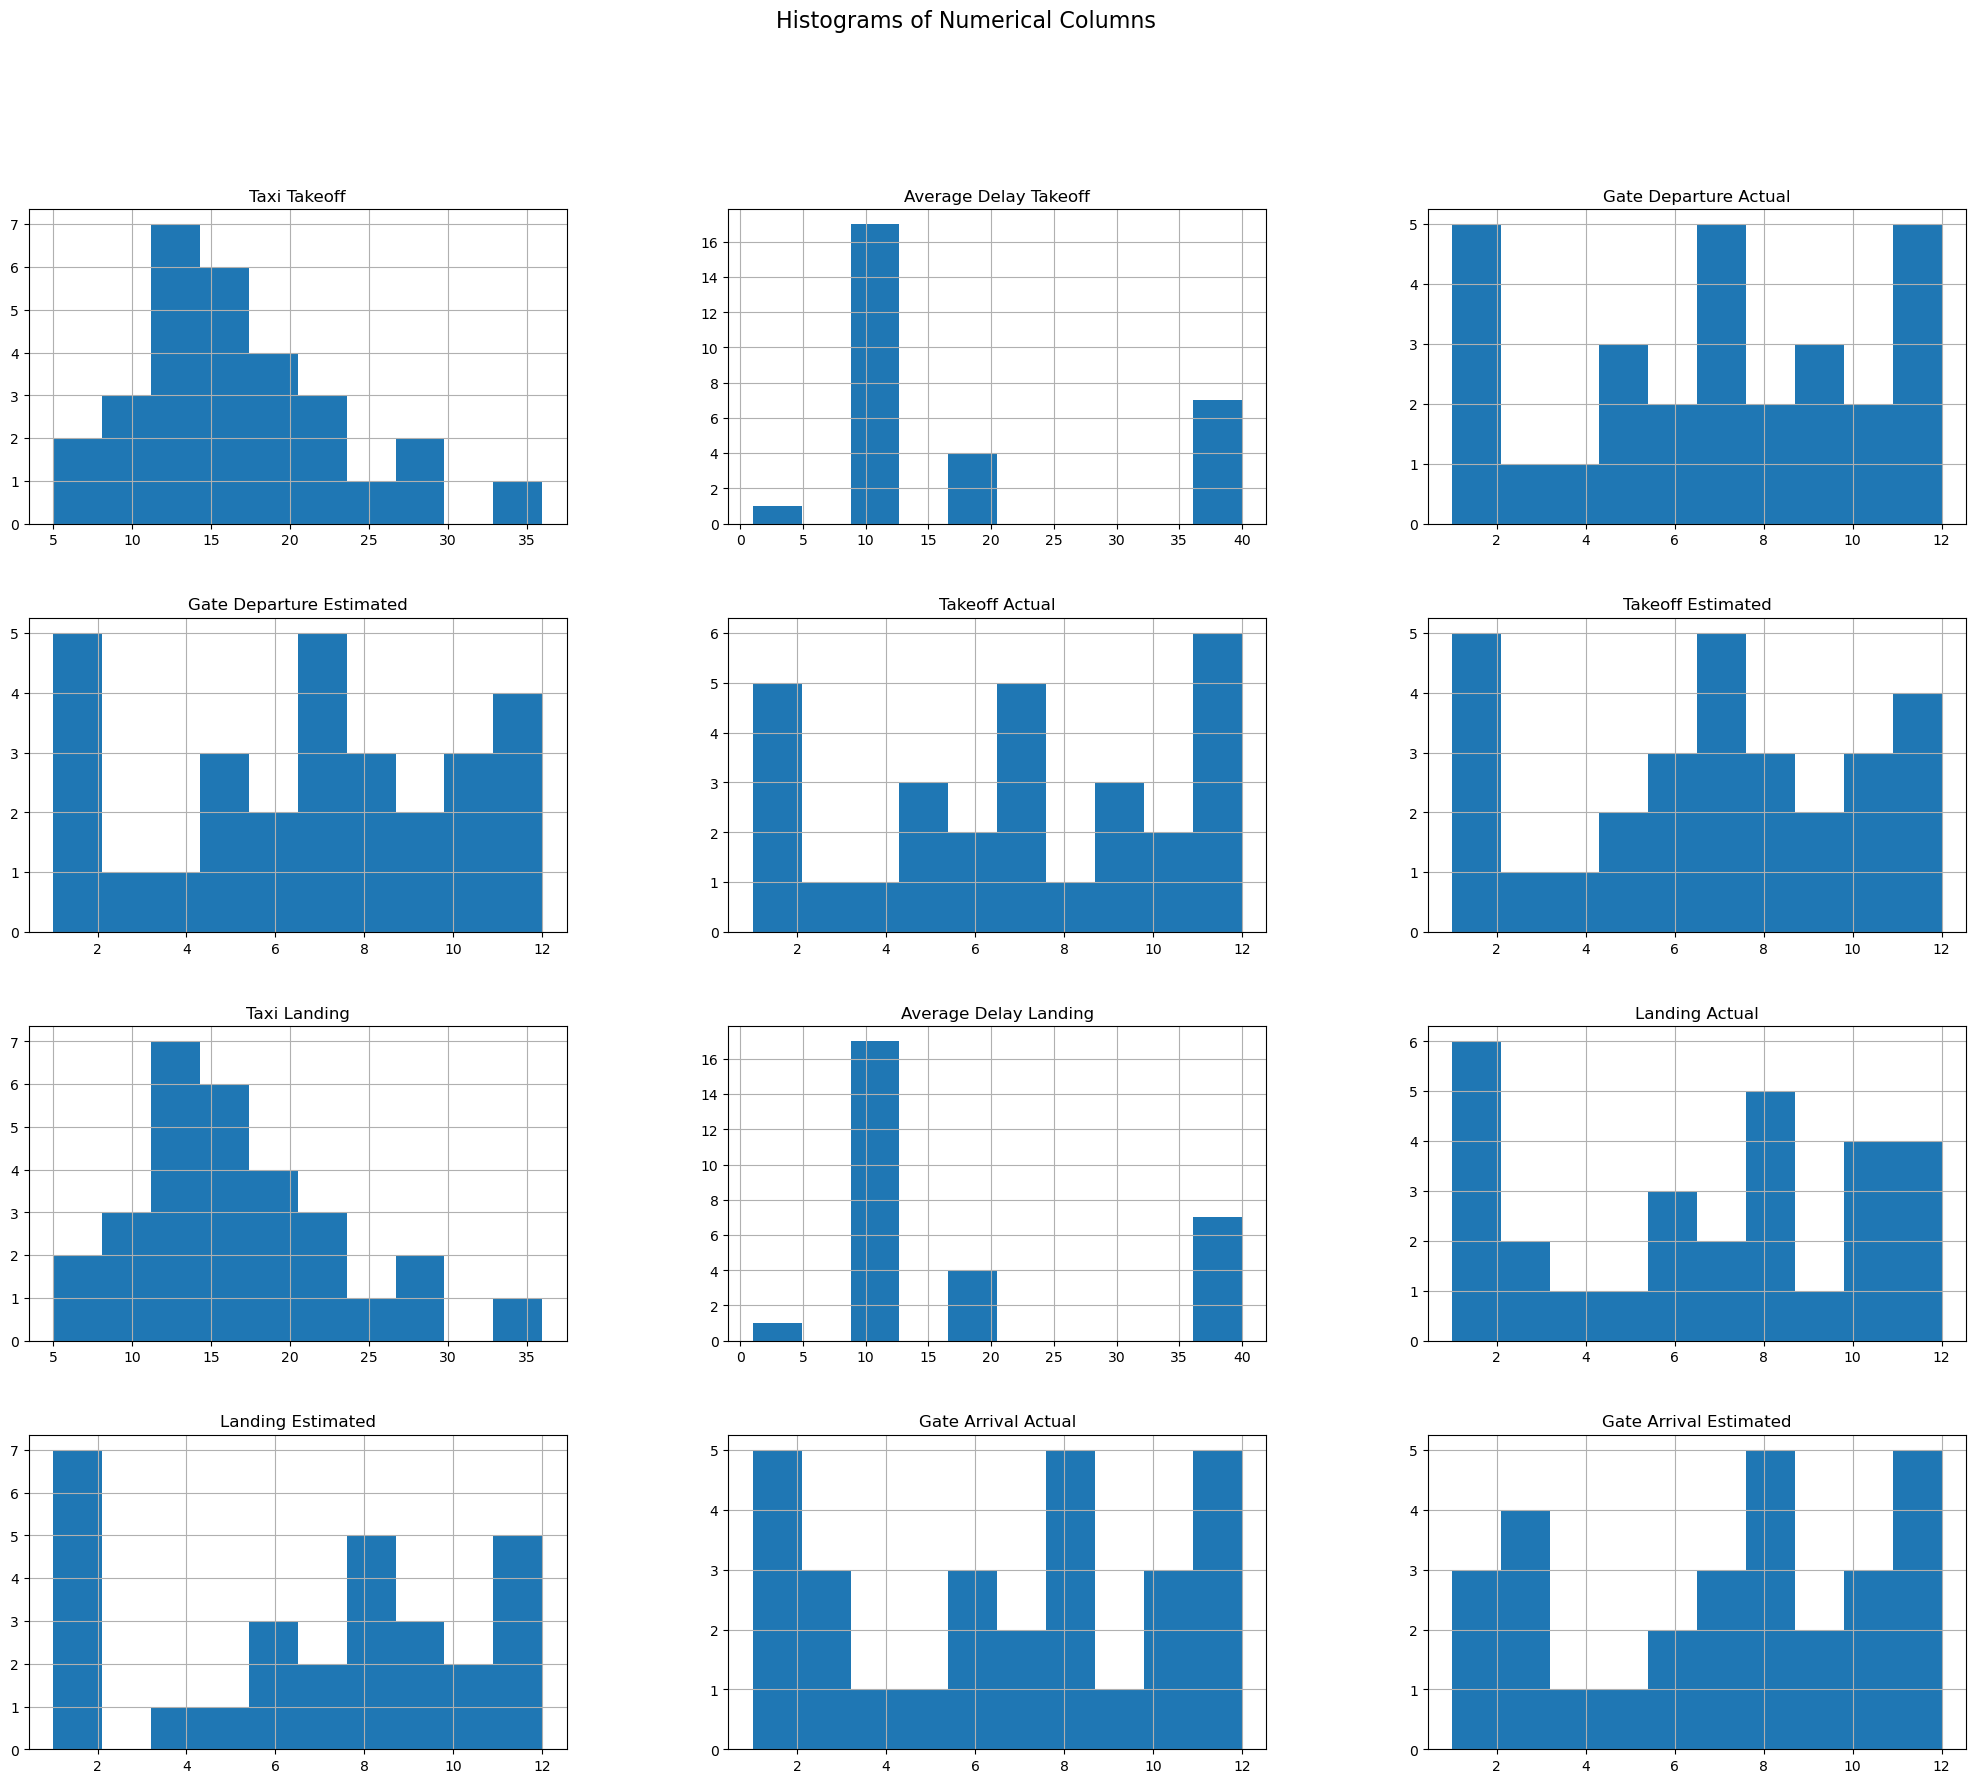

In [6]:
def clean_and_convert(column):
    # Convert column to string type
    column = column.astype(str)
    # Extract numerical values and handle ranges
    numerical_values = column.str.extract(r'(\d+)-?(\d*)')[0].astype(float)
    # For ranges, calculate the average
    range_end = column.str.extract(r'(\d+)-?(\d*)')[1].replace('', np.nan).astype(float)
    numerical_values += range_end.fillna(0) / 2
    
    # Replace any NaN values with -1 to indicate that the value could not be extracted
    numerical_values.fillna(-1, inplace=True)
    
    return numerical_values

# Clean and convert selected columns to numerical types
columns_to_clean = ['Taxi Takeoff', 'Average Delay Takeoff', 'Gate Departure Actual', 
                    'Gate Departure Estimated', 'Takeoff Actual', 'Takeoff Estimated',
                    'Taxi Landing', 'Average Delay Landing', 'Landing Actual',
                    'Landing Estimated', 'Gate Arrival Actual', 'Gate Arrival Estimated']

for column in columns_to_clean:
    df.loc[:, column] = clean_and_convert(df[column].copy())

# Plot histograms for all numerical columns
df[columns_to_clean].hist(figsize=(25, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()


## Data Preprocessing
### Creating Noise

In [7]:
# # Define the standard deviation for the noise 
# std_dev = 5  

# # Function to add noise to numerical columns in a DataFrame
# def add_noise(df, std_dev=1):
#     df_with_noise = df.copy()  # Create a copy of the original dataframe
#     for col in df_with_noise.columns[2:]:
#         noise = np.random.normal(0, std_dev, len(df))  # Use len(df) instead of len(data)
#         df_with_noise[col] += noise
#     return df_with_noise

# # Add noise to the numerical columns of the DataFrame with a standard deviation of 1
# df_with_noise = add_noise(df, std_dev=1)

# # Display the modified dataset
# print(df_with_noise)

## 

# Flight Model

In [8]:

# Columns to use for training
columns_to_use = ['Taxi Takeoff', 'Average Delay Takeoff', 'Gate Departure Actual',
                  'Gate Departure Estimated', 'Takeoff Actual', 'Takeoff Estimated',
                  'Taxi Landing', 'Average Delay Landing', 'Landing Actual',
                  'Landing Estimated', 'Gate Arrival Actual', 'Gate Arrival Estimated']

# Define features and target column
features = ['Taxi Takeoff', 'Average Delay Takeoff', 'Gate Departure Actual', 
            'Gate Departure Estimated', 'Takeoff Actual', 'Takeoff Estimated',
            'Taxi Landing', 'Average Delay Landing', 'Landing Actual',
            'Landing Estimated', 'Gate Arrival Actual', 'Gate Arrival Estimated']
target = 'Landing Actual'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Decision Tree Model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_acc_scores = cross_val_score(dt_classifier, X, y, cv=kf)

# Random Forest Model
rf_classifier = RandomForestClassifier(random_state=42)
rf_acc_scores = cross_val_score(rf_classifier, X, y, cv=kf)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)
rfreg_acc_scores = cross_val_score(rf_regressor, X, y, cv=kf)

l_regressor = LinearRegression()
lr_acc_scores = cross_val_score(l_regressor, X, y, cv=kf)

# Print the mean accuracy scores
print("Mean Accuracy Scores:")
print("Decision Tree Classifier:", np.mean(dt_acc_scores))
print("Random Forest Classifier:", np.mean(rf_acc_scores))
print("Random Forest Regressor:", np.mean(rfreg_acc_scores))
print("Linear Regressor:", np.mean(lr_acc_scores))





Mean Accuracy Scores:
Decision Tree Classifier: 0.6933333333333334
Random Forest Classifier: 0.6600000000000001
Random Forest Regressor: 0.903905230926833
Linear Regressor: 1.0


## Heatmap

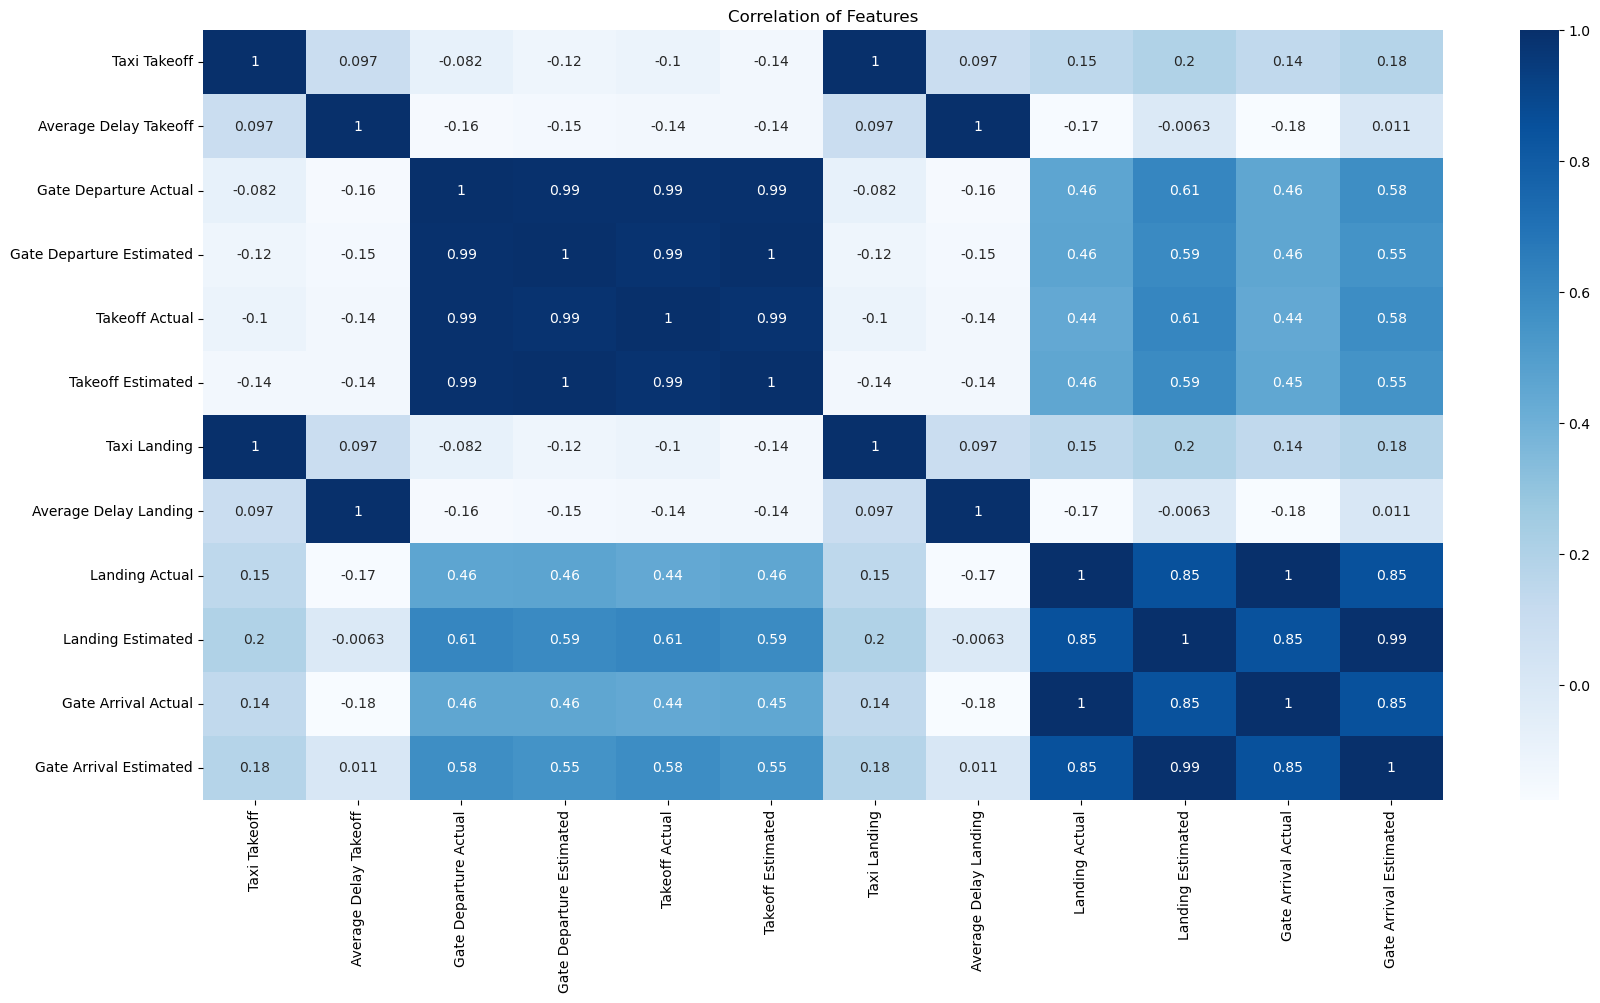

In [9]:
# Heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df[features].corr(), annot=True, cmap='Blues')
plt.title("Correlation of Features")
plt.show()

In [10]:

# Target column
target_column = 'Landing Actual'

# Splitting the data into features (X) and target variable (y)
X = df[columns_to_use]
y = df[target_column]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = RandomForestRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.051933333333333415


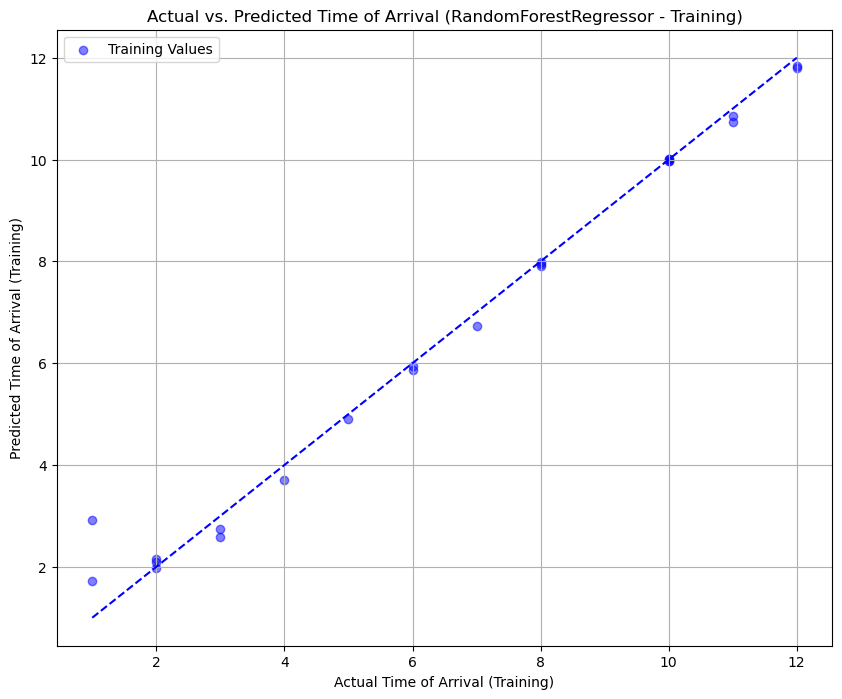

In [11]:
# Fit RandomForestRegressor on the training data
rf_regressor.fit(X_train, y_train)

# Plot actual vs. predicted values for training data
plt.figure(figsize=(10, 8))
plt.scatter(y_train, rf_regressor.predict(X_train), color='blue', alpha=0.5, label='Training Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='blue')  # Diagonal line
plt.xlabel("Actual Time of Arrival (Training)")
plt.ylabel("Predicted Time of Arrival (Training)")
plt.title("Actual vs. Predicted Time of Arrival (RandomForestRegressor - Training)")
plt.legend()
plt.grid(True)
plt.show()


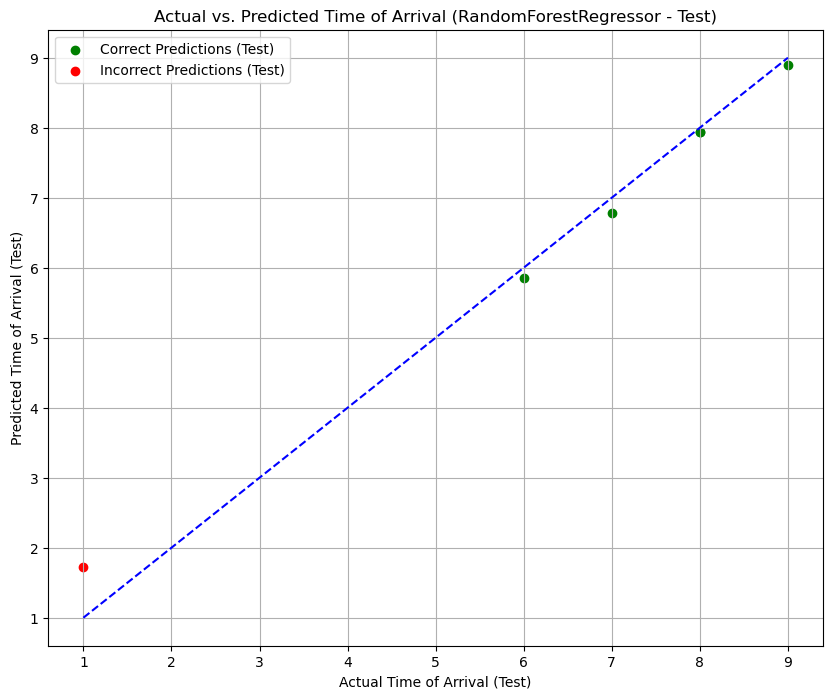

In [12]:
# Define threshold for acceptable error
threshold = 0.3  

# Fit RandomForestRegressor on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_regressor.predict(X_test)

# Calculate absolute error
absolute_error = np.abs(y_test - y_pred_rf)

# Determine if each prediction is within the threshold
correct_predictions = absolute_error <= threshold

# Plot actual vs. predicted values for test data, color coding based on correctness
plt.figure(figsize=(10, 8))
plt.scatter(y_test[correct_predictions], y_pred_rf[correct_predictions], color='green', label='Correct Predictions (Test)')
plt.scatter(y_test[~correct_predictions], y_pred_rf[~correct_predictions], color='red', label='Incorrect Predictions (Test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue')  # Diagonal line
plt.xlabel("Actual Time of Arrival (Test)")
plt.ylabel("Predicted Time of Arrival (Test)")
plt.title("Actual vs. Predicted Time of Arrival (RandomForestRegressor - Test)")
plt.legend()
plt.grid(True)
plt.show()


## Importance of features in the RF Regressor

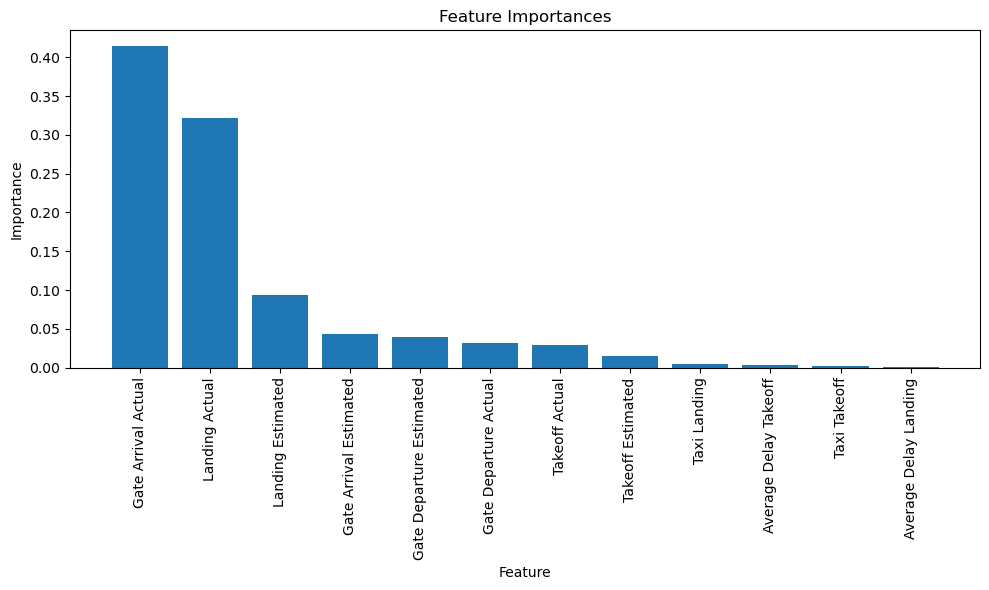

In [13]:
# Fit RandomForestRegressor on the training data
rf_regressor.fit(X_train, y_train)

# Get feature importances
importances = rf_regressor.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
